In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
# import
df_NEES = pd.read_csv('Output/NEES_summary.csv')
df_ddF = pd.read_csv('SourceData/ddF.csv')

In [22]:
# Create AH name column
df_ddF['AH_name'] = df_ddF['Protein_Name'] + '-' + df_ddF['AH#'].astype(str)
df_ddF['AH_name'] = df_ddF['AH_name'].str.replace('-1', '')
# lowercase
df_ddF['AH_name'] = df_ddF['AH_name'].str.lower()

# lowercase
df_NEES['AH'] = df_NEES['AH'].str.lower()

# merge
df = pd.merge(df_ddF, df_NEES, left_on='AH_name', right_on='AH', how='inner')

# Create a new column for the absolute values of ddF
df['ddF(absolute value)'] = df['ddF'].abs()
df['ddF_adj(absolute value)'] = df['ddF_adj'].abs()

In [23]:
# Bin NEES median values by arbitrary thresholds
def categorize_NEES(value):
    thresholds = [0.5, 0.7]
    if value <= thresholds[0]:
        return 'No Binding'
    elif thresholds[0] < value <= thresholds[1]:
        return 'Subtle Binding'
    else:
        return 'Strong Binding'

# Apply the function to the Median column
df['NEES_binned'] = df['Median'].apply(categorize_NEES)

In [25]:
# Output for Prism use
df.to_csv('./Output/ddFvsNEES.csv', index=False)

In [26]:
# Define the specific order for the NEES_binned categories
order = ['No Binding', 'Subtle Binding', 'Strong Binding']

# A bespoke funtion for plotting
def myboxplot(df, x, y):
    # Create a box plot for the new column 'phob_V' by 'NEES_binned'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=df, order=order, palette="Blues")
    # Add scatter points jittered for better visualization
    sns.stripplot(x=x, y=y, data=df, order=order, color='black', jitter=True, alpha=0.5)

    plt.title(f'{x} by {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

def myscatterplot(df, x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], df['Median'], alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.title(f'Scatter Plot of {x} against Median values')
    plt.xlabel(x)
    plt.ylabel('Median')
    plt.grid(True)
    plt.show()

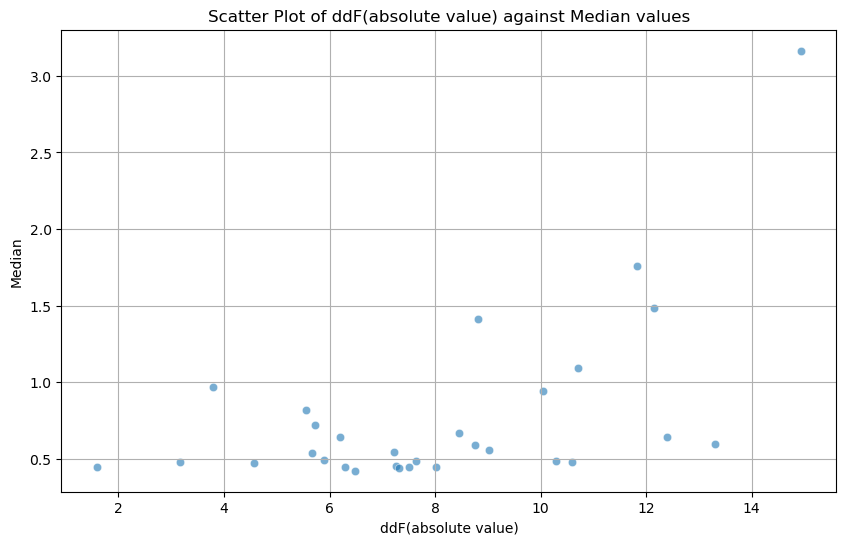

In [27]:
# Plotting the absolute ddF values against Median values
myscatterplot(df, x='ddF(absolute value)', y='Median')

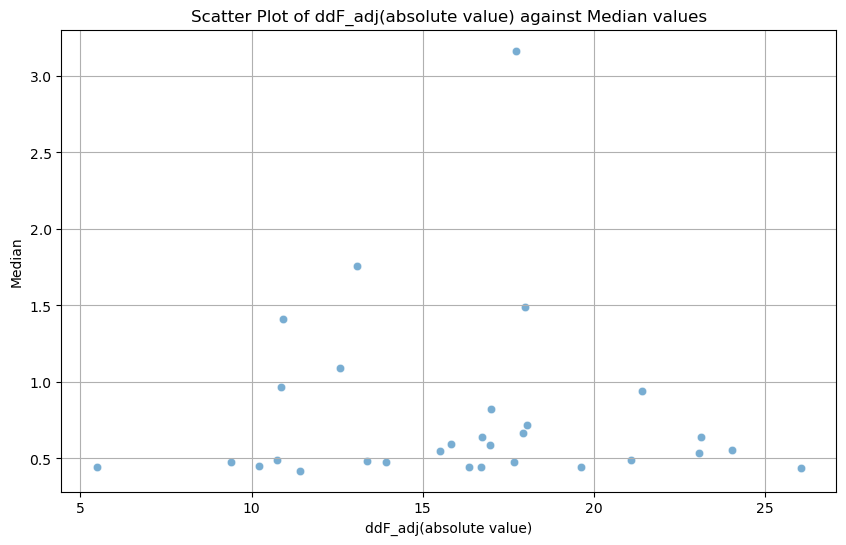

In [28]:
# Plotting the absolute ddF values against Median values
myscatterplot(df, x='ddF_adj(absolute value)', y='Median')

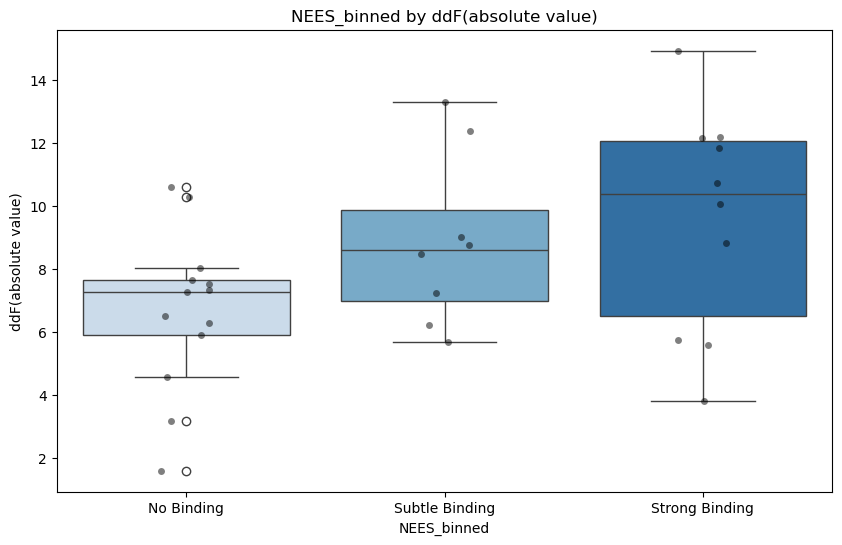

In [29]:
myplot(df, x='NEES_binned', y='ddF(absolute value)')

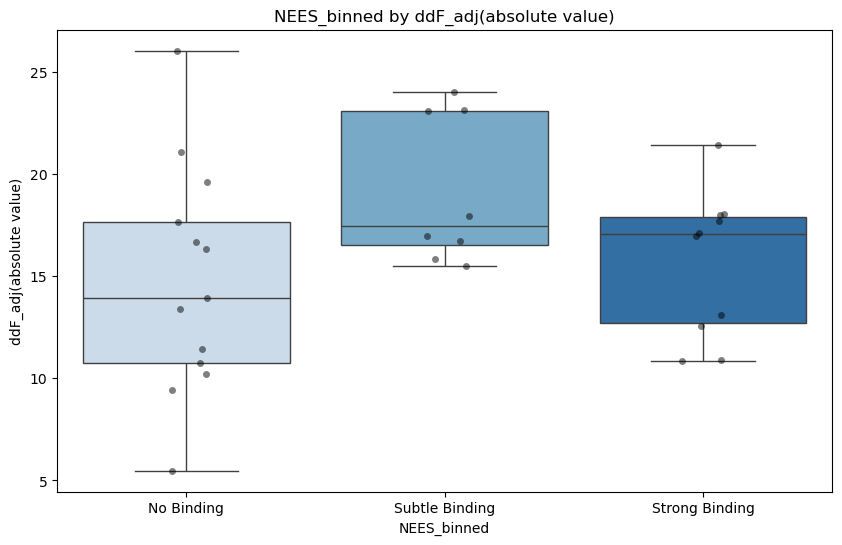

In [30]:
myplot(df, x='NEES_binned', y='ddF_adj(absolute value)')